In [7]:
from utils import *

# Load and read the JSON file to extract new parameters
json_path = 'Fiji_scenario3.json'
with open(json_path, 'r') as file:
    df = json.load(file)
    
    
n = df['n'].copy()
outside_world = {'Outside World': n.pop('Outside World')}
sorted_data = {k: n[k] for k in sorted(n)}
locations = {**outside_world, **sorted_data}
links = df['Connectivity Matrix W'].copy()
ports = df['ports_according_communities'].copy()
print(links)
print(ports)
print(locations)

{'Outside World-FP,Suva-FP': 3000, 'Outside World-AP,Nadi-AP': 4500, 'Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP': 294, 'Denarau-FP,Bounty Island-FP': 90, 'Denarau-FP,Tokoriki Island-FP': 45, 'Denarau-FP,Group 2 (Tadrai/Mana)-FP': 120, 'Denarau-FP,Group 3 (Treasure/Beachconber)-FP': 60, 'Denarau-FP,Matamanoa Island-FP': 22, 'Natovi Jetty-FP,Nabouwalu-FP': 1200, 'Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP': 361, 'Lautoka-FP,Coralview Island-FP': 333, 'Lautoka-FP,Octopus Resort-FP': 75, 'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP': 50, 'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Group 2 (Tadrai/Mana)-FP': 80, 'Bounty Island-FP,Group 2 (Tadrai/Mana)-FP': 70, 'Bounty Island-FP,Group 3 (Treasure/Beachconber)-FP': 50, 'Suva-FP,Kadavu-FP': 1630, 'Group 1 (Paradise/MantaRay/Barefoot)-FP,Group 3 (Treasure/Beachconber)-FP': 60, 'Group 1 (Paradise/MantaRay/Barefoot)-FP,Octopus Resort-FP': 30, 'Tokoriki Island-FP,Group 3 (Treasure/Beachconber)-FP': 40, 

In [8]:
import networkx as nx
# Re-map airport/port to locations
location_map = {}
for location, ap_fp_list in ports.items():
    for ap_fp in ap_fp_list:
        location_map[ap_fp] = location

# Re-aggregate connections based on locations, summing the volumes
G_locations = nx.Graph()
for line, volume in links.items():
    ports = line.split(',')
    location1 = location_map[ports[0]]
    location2 = location_map[ports[1]]

    # Check if the edge already exists and add the volume
    if G_locations.has_edge(location1, location2):
        G_locations[location1][location2]['volume'] += volume
    else:
        G_locations.add_edge(location1, location2, volume=volume)

In [9]:
# Output the new graph info again
print(G_locations.number_of_nodes())
print(G_locations.number_of_edges())
print(list(G_locations.edges(data=True))) # Show only first 5 edges for brevity

26
42
[('Outside World', 'Suva', {'volume': 3000}), ('Outside World', 'Nadi', {'volume': 4500}), ('Suva', 'Kadavu', {'volume': 1630}), ('Suva', 'Nadi', {'volume': 6000}), ('Suva', 'Tavuki', {'volume': 200}), ('Suva', 'Lakeba', {'volume': 160}), ('Suva', 'Cicia', {'volume': 100}), ('Suva', 'Lomaloma/Mualevu', {'volume': 140}), ('Suva', 'LomaivitiOtherIslands', {'volume': 34}), ('Suva', 'Koro', {'volume': 200}), ('Suva', 'Bua/Macuata/Cakaudrove', {'volume': 4500}), ('Suva', 'Wainikeli', {'volume': 200}), ('Nadi', 'Malolo(Tropica/Malolo/Likuliku/Castaway)', {'volume': 494}), ('Nadi', 'Vuda(Bounty Island)', {'volume': 90}), ('Nadi', 'Malolo(Tokoriki Island)', {'volume': 45}), ('Nadi', 'Malolo(Tadrai/Mana)', {'volume': 120}), ('Nadi', 'Vuda(Treasure/Beachconber)', {'volume': 60}), ('Nadi', 'Malolo(Matamanoa Island)', {'volume': 22}), ('Nadi', 'Yasawa', {'volume': 150}), ('Nadi', 'Serua', {'volume': 2454}), ('Nadi', 'Tavuki', {'volume': 300}), ('Nadi', 'Bua/Macuata/Cakaudrove', {'volume': 75

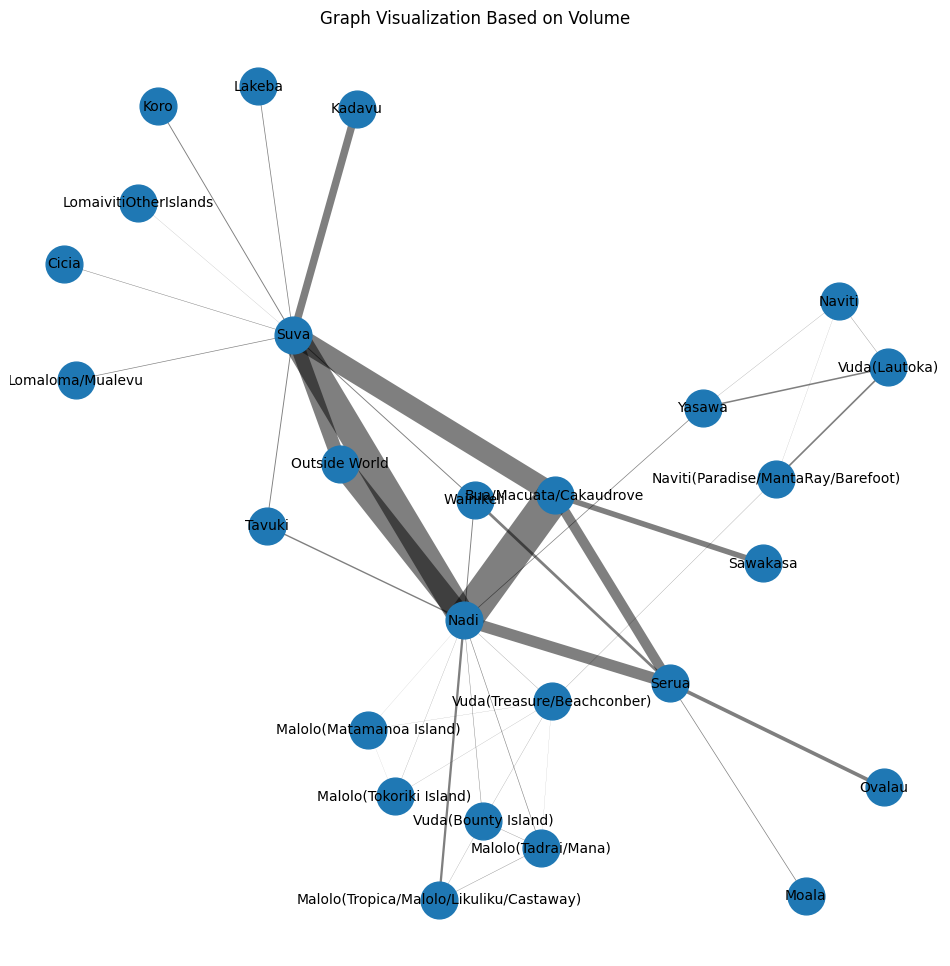

In [10]:
import matplotlib.pyplot as plt

# Create a plot with weighted edges where weights are represented by the 'volume' attribute
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_locations)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G_locations, pos, node_size=700)

# Draw edges with varying widths based on volume
for (u, v, d) in G_locations.edges(data=True):
    nx.draw_networkx_edges(G_locations, pos, edgelist=[(u, v)], width=d['volume']/300, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G_locations, pos, font_size=10, font_family='sans-serif')

plt.title('Graph Visualization Based on Volume')
plt.axis('off')  # Turn off the axis
plt.show()


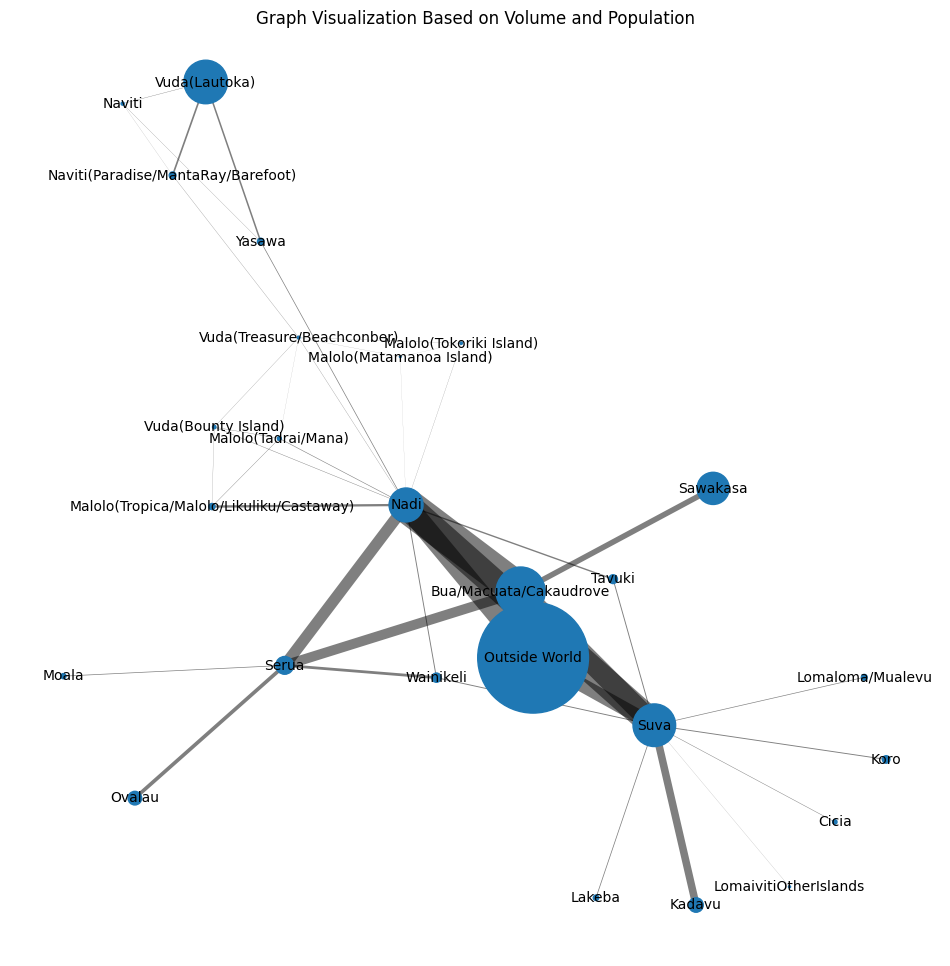

In [11]:
# Update the graph visualization to incorporate population size as node size

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_locations)  # positions for all nodes

# Calculate node sizes based on population
node_sizes = [locations[node] * 0.01 for node in G_locations.nodes()]  # Scale down for better visualization

# Draw nodes with size based on population
nx.draw_networkx_nodes(G_locations, pos, node_size=node_sizes)

# Draw edges with varying widths based on volume
for (u, v, d) in G_locations.edges(data=True):
    nx.draw_networkx_edges(G_locations, pos, edgelist=[(u, v)], width=d['volume']/300, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G_locations, pos, font_size=10, font_family='sans-serif')

plt.title('Graph Visualization Based on Volume and Population')
plt.axis('off')  # Turn off the axis
plt.show()

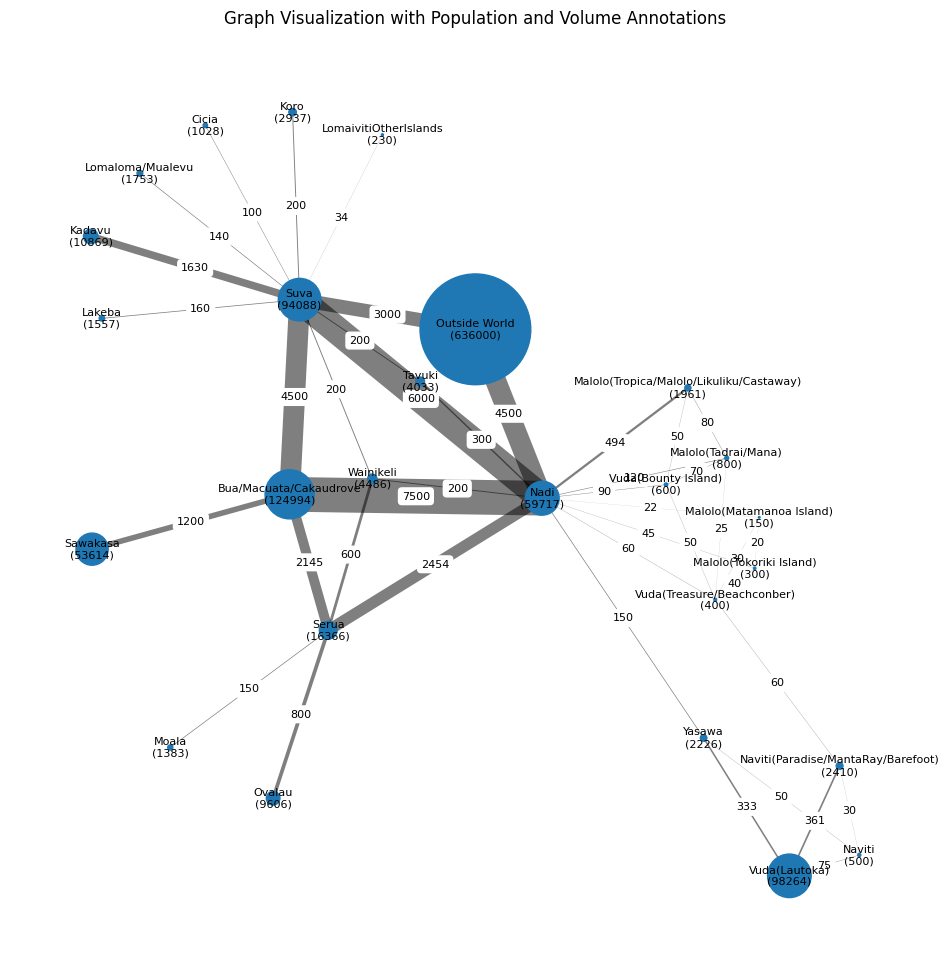

In [12]:
# Create a plot with annotations for both nodes and edges

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_locations)  # positions for all nodes

# Calculate node sizes based on population
node_sizes = [locations.get(node, 0) * 0.01 for node in G_locations.nodes()]  # Scale down for better visualization

# Draw nodes with size based on population
nx.draw_networkx_nodes(G_locations, pos, node_size=node_sizes)

# Draw edges with varying widths based on volume
edges = nx.draw_networkx_edges(G_locations, pos, edgelist=G_locations.edges(), width=[d['volume']/300 for u, v, d in G_locations.edges(data=True)], alpha=0.5)

# Draw labels for nodes with population
node_labels = {node: f"{node}\n({pop})" for node, pop in locations.items()}
nx.draw_networkx_labels(G_locations, pos, labels=node_labels, font_size=8)

# Add edge labels for volume
edge_labels = {(u, v): f"{d['volume']}" for u, v, d in G_locations.edges(data=True)}
nx.draw_networkx_edge_labels(G_locations, pos, edge_labels=edge_labels, font_size=8, rotate=False)

plt.title('Graph Visualization with Population and Volume Annotations')
plt.axis('off')  # Turn off the axis
plt.show()